In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers,models 

## Plan for the file

1. look at the data
2. look at the different unique values in the data
3. find out what is the label
4. find out what the features are
5. split the data
6. scale the input data
7. transform the input and the test data
8. train a model
9. make predictions with the model
10. test the model
11. test with the holdout set


In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
df.pixel0.min()

np.int64(0)

In [5]:
df.max().sort_values(ascending=False)

pixel767    255
pixel766    255
pixel768    255
pixel613    255
pixel618    255
           ... 
pixel757      0
pixel759      0
pixel758      0
pixel760      0
pixel783      0
Length: 785, dtype: int64

In [6]:
X = df.drop(columns='label',axis=1)
y=df['label']


In [26]:
X.loc[0,:].values.reshape((-1,1)).shape

(784, 1)

In [20]:
type(X.loc[0,:].values.reshape((-1,1)))

numpy.ndarray

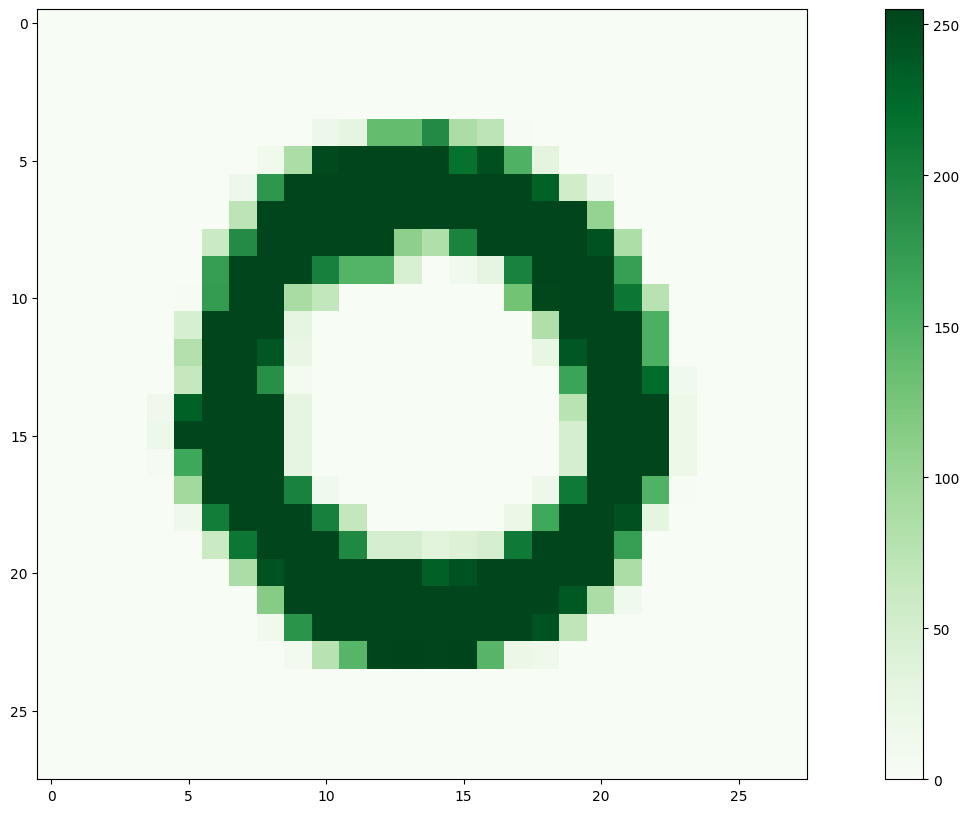

In [34]:
plt.figure(figsize=(20,10))
num = plt.imshow(X.iloc[1,:].values.reshape((28,28)),cmap='Greens')
plt.colorbar(num)
plt.show()

the minimum value of all columns is zero and the maximum value is 255

I will scale by dividing all the columns by 255

In [35]:
X = X/255

In [36]:
X.max().sort_values(ascending=False)

pixel768    1.0
pixel767    1.0
pixel766    1.0
pixel769    1.0
pixel770    1.0
           ... 
pixel755    0.0
pixel757    0.0
pixel758    0.0
pixel759    0.0
pixel760    0.0
Length: 784, dtype: float64

I will now split the data using train_test_split

In [37]:
y.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

I will now make the model.

The model will take in each input picture which is the 784 numpy array shape matrix.

It will then go through the internal layers and then spit out 1 value which will be in between 0-9.

The internal layers will be a conv2d layer

the activation function for the con2d layer willbe relu

in between each convolution layer will be a maxpooling2d layer

You will then have to flatten the layers

The pass the flattened layers through some dense layers with the same relu activation function

and then pass through the final layer with a shape of 10 since we have 10 output classes

(check if you need a shape of 10 since you only want 1 output class)

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow import keras

In [46]:
model.compile(optimizer='adam',loss='mse',metrics=[keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 784), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (None, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 784), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(X_,  test_labels, verbose=2)